# 2장 머신러닝 프로젝트 처음부터 끝까지

# 데이터 다운로드

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import pand

def downData(housingUrl, housingPath):
    if not os.path.isdir(housingPath):
        os.makedirs(housingPath)
    tgzPath = os.path.join(housingPath, "housing.tgz")
    urllib.request.urlretrieve(housingUrl, tgzPath) #파일 열기
    housingTgz = tarfile.open(tgzPath)
    housingTgz.extractall(path=housingPath) #압축풀기
    housingTgz.close()

def loadData(housingPath):
    csvPath = os.path.join(housingPath, "housing.csv")
    return pd.read_csv(csvPath)

## OS패키지

### 1. 파일 목록 얻기

(1) glob.glob(wildcard) - 유닉스 경로명 패턴 스타일로 파일 목록을 얻을 수 있다.

(2) os.listdir(path) - 지정된 디렉토리의 전체 파일 목록을 얻을 수 있다.

(3) dircache.listdir(path) - os.listdir(path)와 동일한 파일 목록을 전달한다.

path가 변경되지 않았을 때, dircache.listdir()은 다시 디렉토리 구조를 읽지 않고 이미 읽은 정보를 활용

dircache.annotate(head, list) - 일반 파일명과 디렉토리명을 구분해주는 함수



### 2. 디렉토리 다루기

os.chdir(path) - 작업하고 있는 디렉토리 변경

os.getcwd() - 현재 프로세스의 작업 디렉토리 얻기

기타 여러 함수가 있다.



### 3. 파일 이름 다루기

os.path.abspath(filename) - 파일의 상대 경로를 절대 경로로 바꾸는 함수

os.path.exists(filename) - 주어진 경로의 파일이 있는지 확인하는 함수


os.curdir() - 현재 디렉토리 얻기

os.pardir() - 부모 디렉토리 얻기

os.sep() - 디렉토리 분리 문자 얻기



### 4. 경로명 분리하기


os.path.basename(filename) - 파일명만 추출

os.path.dirname(filename) - 디렉토리 경로 추출

os.path.split(filename) - 경로와 파일명을 분리

os.path.splitdrive(filename) - 드라이브명과 나머지 분리 (MS Windows의 경우)

os.path.splitext(filename) - 확장자와 나머지 분리

In [2]:
downUrl = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
housingPath = os.path.join("datasets", "housing")# datasets/housing
housingUrl = downUrl + "datasets/housing/housing.tgz"

downData(housingUrl,housingPath)
housing = loadData(housingPath)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


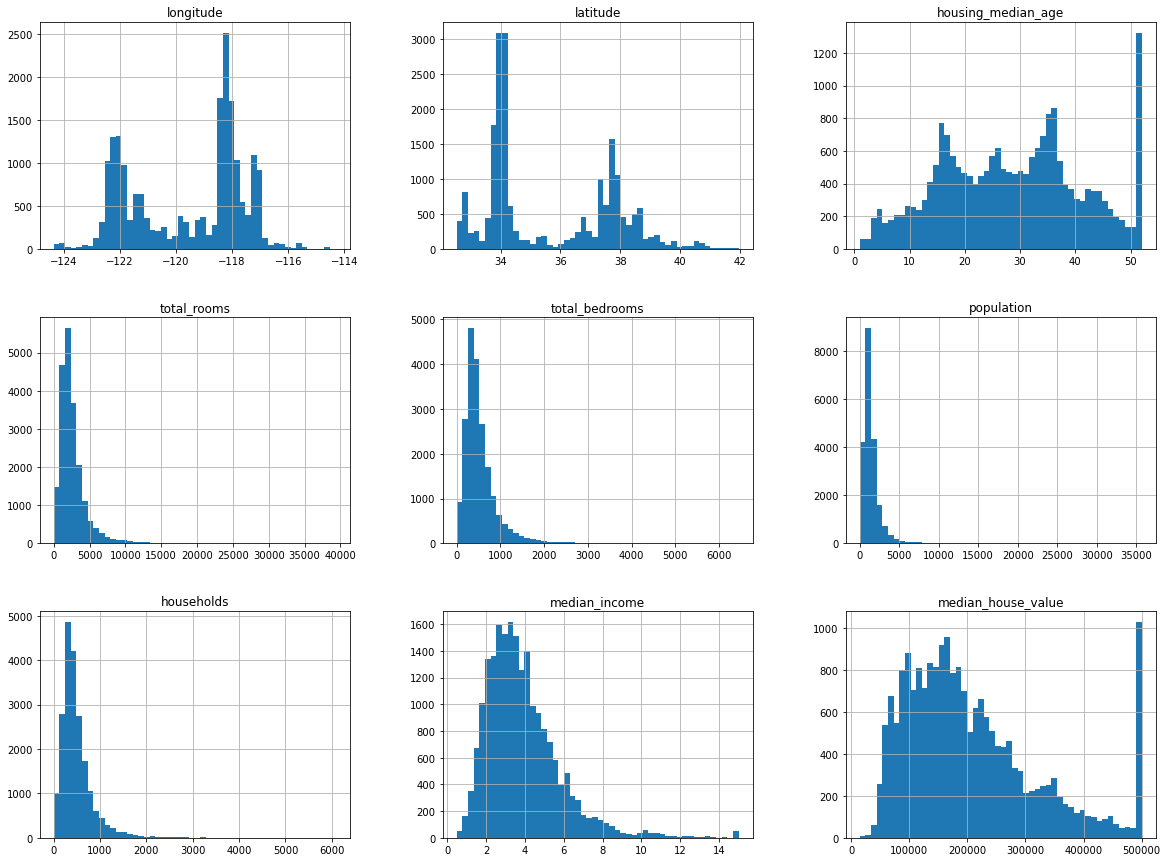

In [6]:
%matplotlib inline
#주피터 노트북 벡엔드 사용
import matplotlib.pyplot as plt

binsValue=50
housing.hist(bins=binsValue, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
trainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(housing, housing["income_cat"]):
    stratTrainSet = housing.loc[trainIndex]
    stratTestSet = housing.loc[testIndex]

In [12]:
for sets in (stratTrainSet, stratTestSet):
    sets.drop("income_cat", axis=1, inplace=True)

In [13]:
stratTrainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


# 데이터 이해, 탐색 & 시각화

In [14]:
housing = stratTrainSet.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

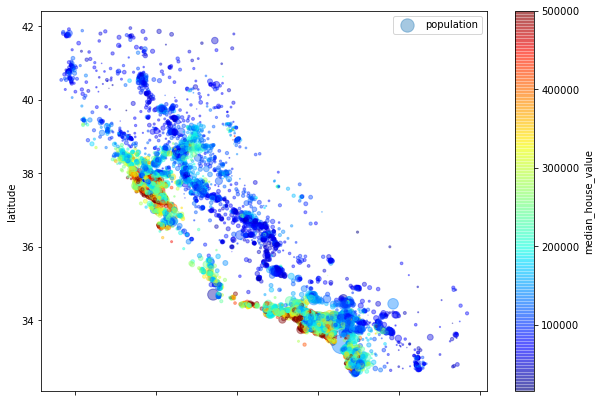

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [16]:
corrMat=housing.corr()
corrMat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

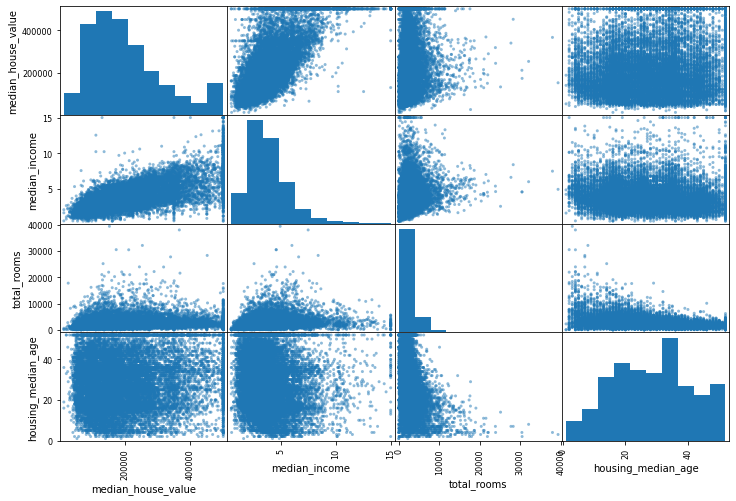

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

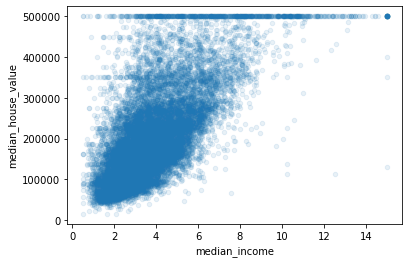

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

# 전처리

In [19]:
housing = stratTrainSet.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housingLabels = stratTrainSet["median_house_value"].copy()

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [21]:
housingLabels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housingNum = housing.drop("ocean_proximity", axis=1)

imputer.fit(housingNum)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(housingNum)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [24]:
housingTr = pd.DataFrame(X, columns=housingNum.columns,index=housingNum.index)
housingTr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [25]:
from sklearn.preprocessing import OrdinalEncoder

housingOcean = housing[["ocean_proximity"]]
ordinalEncoder = OrdinalEncoder()
housingOceanEncoded = ordinalEncoder.fit_transform(housingOcean)
housingOceanEncoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [26]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
from sklearn.preprocessing import OneHotEncoder

oneHotEnc = OneHotEncoder()
housingOcean1H = oneHotEnc.fit_transform(housingOcean)

housingOcean1H.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
roomsNcol, bedroomsNcol, populationNcol, householdsNcol = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, addBedroomsPerRoom = True): # *args 또는 **kargs 없음
        self.addBedroomsPerRoom = addBedroomsPerRoom
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        roomsPerHousehold = X[:, roomsNcol] / X[:, householdsNcol]
        populationPerHousehold = X[:, populationNcol] / X[:, householdsNcol]
        if self.addBedroomsPerRoom:
            bedroomsPerRoom = X[:, bedroomsNcol] / X[:, roomsNcol]
            return np.c_[X, roomsPerHousehold, populationPerHousehold,bedroomsPerRoom]
        else:
            return np.c_[X, roomsPerHousehold, populationPerHousehold]

attrAdder = CombinedAttributesAdder(addBedroomsPerRoom=False)
housingExtraAttribs = attrAdder.transform(housing.to_numpy())

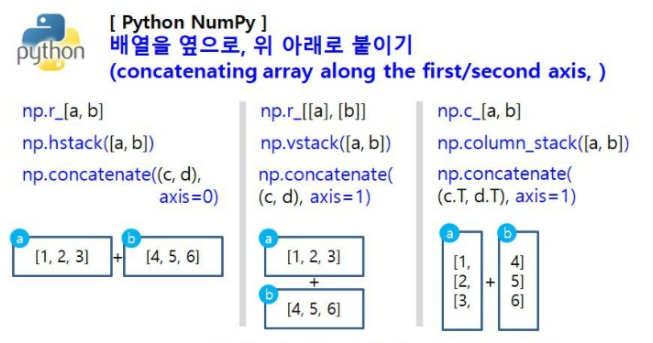

In [29]:
housingExtraAttribs=pd.DataFrame(housingExtraAttribs,
                                 columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
                                 index=housing.index)
housingExtraAttribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [30]:
housingNum

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numPipeline = Pipeline([
        ('imputer', imputer),#imputer = simpleimputer(median)
        ('attribsAdder', CombinedAttributesAdder()),
        ('stdScaler', StandardScaler()),
    ])

housingNumTr = numPipeline.fit_transform(housingNum) #housingNum = housing.drop("ocean_proximity", axis=1)

In [32]:
housingNumTr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [33]:
from sklearn.compose import ColumnTransformer

numAttribs = list(housingNum)
catAttribs = ["ocean_proximity"]

fullPipeline = ColumnTransformer([
        ("num", numPipeline, numAttribs),
        ("cat", OneHotEncoder(), catAttribs),
    ])

housingPrepared = fullPipeline.fit_transform(housing)

In [34]:
housingPrepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
housingPrepared.shape

(16512, 16)

# 모델선택 & 훈련

In [36]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(housingPrepared, housingLabels)

LinearRegression()

In [37]:
someData = housing.iloc[:5]
someLabels = housingLabels.iloc[:5]
someDataPrepared = fullPipeline.transform(someData)

print("예측:", linReg.predict(someDataPrepared))
print("레이블:", list(someLabels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [38]:
from sklearn.metrics import mean_squared_error

housingPredictions = linReg.predict(housingPrepared)
linMse = mean_squared_error(housingLabels, housingPredictions)
linRmse = np.sqrt(linMse)
print("선형 회귀 RMSE : ", linRmse)

선형 회귀 RMSE :  68628.19819848923


In [39]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(random_state=42)
treeReg.fit(housingPrepared, housingLabels)

housingPredictions = treeReg.predict(housingPrepared)
treeMse = mean_squared_error(housingLabels, housingPredictions)
treeRmse = np.sqrt(treeMse)
print("결정트리 RMSE : ", treeRmse)

결정트리 RMSE :  0.0


# 모델 세부 튜닝

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treeReg, housingPrepared, housingLabels,
                         scoring="neg_mean_squared_error", cv=10)
treeRmseScores = np.sqrt(-scores)

In [42]:
def displayScores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

displayScores(treeRmseScores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


In [43]:
linScores = cross_val_score(linReg, housingPrepared, housingLabels,
                             scoring="neg_mean_squared_error", cv=10)
linRmseScores = np.sqrt(-linScores)
displayScores(linRmseScores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.674001798349


In [45]:
from sklearn.ensemble import RandomForestRegressor

forestReg = RandomForestRegressor(random_state=42)
forestReg.fit(housingPrepared, housingLabels)

RandomForestRegressor(random_state=42)

In [47]:
housingPredictions = forestReg.predict(housingPrepared)
forestMse = mean_squared_error(housingLabels, housingPredictions)
forestRmse = np.sqrt(forestMse)
forestRmse

forestScores = cross_val_score(forestReg, housingPrepared, housingLabels,
                                scoring="neg_mean_squared_error", cv=10)
forestRmseScores = np.sqrt(-forestScores)
displayScores(forestRmseScores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


In [49]:
from sklearn.svm import SVR

svmReg = SVR(kernel="linear")
svmReg.fit(housingPrepared, housingLabels)
housingPredictions = svmReg.predict(housingPrepared)
svmMse = mean_squared_error(housingLabels, housingPredictions)
svmRmse = np.sqrt(svmMse)
svmRmse

111094.6308539982

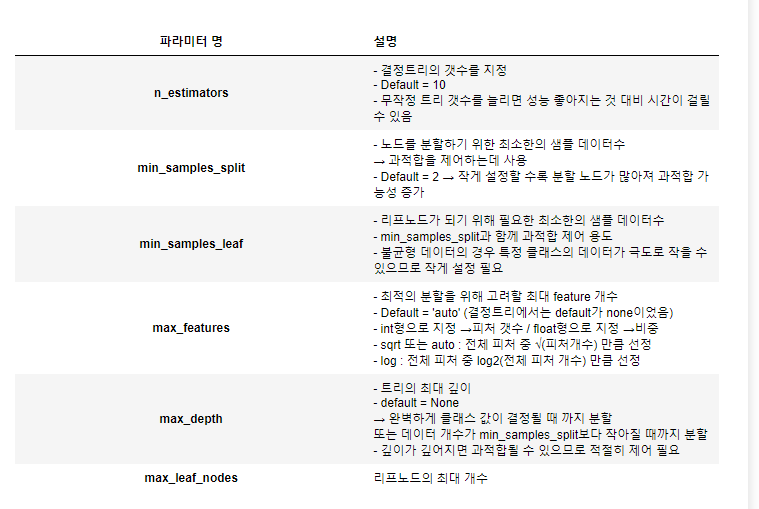

In [51]:
from sklearn.model_selection import GridSearchCV

paramGrid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forestReg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
gridSearch = GridSearchCV(forestReg, paramGrid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
gridSearch.fit(housingPrepared, housingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
gridSearch.best_params_

{'max_features': 8, 'n_estimators': 30}

In [54]:
gridSearch.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [56]:
featureImportances = gridSearch.best_estimator_.feature_importances_

extraAttribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
catEncoder = fullPipeline.named_transformers_["cat"]
cat1HAttribs = list(catEncoder.categories_[0])
attributes = numAttribs + extraAttribs + cat1HAttribs
sorted(zip(featureImportances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [59]:
finalModel = gridSearch.best_estimator_

xTest = stratTestSet.drop("median_house_value", axis=1)
yTest = stratTestSet["median_house_value"].copy()

xTestPrepared = fullPipeline.transform(xTest)
finalPredictions = finalModel.predict(xTestPrepared)

finalMse = mean_squared_error(yTest, finalPredictions)
finalRmse = np.sqrt(finalMse)

print("final RMSE :", finalRmse)

final RMSE : 47730.22690385927


In [61]:
from scipy import stats

confidence = 0.95
squaredErrors = (finalPredictions - yTest) ** 2
np.sqrt(stats.t.interval(confidence, len(squaredErrors) - 1,
                         loc=squaredErrors.mean(),
                         scale=stats.sem(squaredErrors)))

array([45685.10470776, 49691.25001878])